In [1]:
from numpy import logical_and as land, logical_or as lor
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import math
from utilities import to_float, eval_correlation, plot_hist, plot_boxplot

In [2]:
DATA_PATH = 'G:/Shared drives/DM_tweets/data/'

In [2]:
DATA_PATH = 'G:/Drive condivisi/DM_tweets/data/'

In [3]:
df_users = pd.read_csv(DATA_PATH+"users.csv")
df_tweet = pd.read_csv(DATA_PATH+"tweets.csv")

# User analysis

In [4]:
df_users.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_1236\264849779.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_users.info(null_counts=True)


## Language field

There are some mispellings, so we are going to replace the mispelled ones to the correct ones, which are:
- en-gb to en-GB
- zh-tw to zh-TW

There are also two wrong values, 'Select Language...' and 'xx-lc', related to three users in total.

In [5]:
df_users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

## Bot field

In [6]:
df_users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Statuses count field

In [4]:
df_users['statuses_count'] = df_users['statuses_count'].apply(to_float)

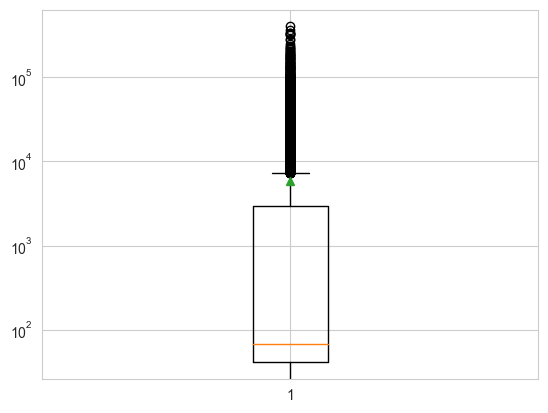

In [33]:
plot_boxplot(df_users, 'statuses_count', log=True)

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


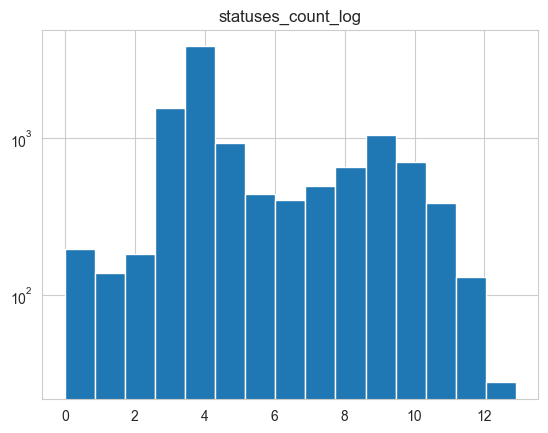

In [10]:
plot_hist(df_users[df_users['statuses_count']!=np.inf], 'statuses_count', log=True)

In [8]:
df_nonnull_statuses_count = df_users[df_users['statuses_count'] != -1]
mean = np.mean(df_nonnull_statuses_count.statuses_count.values)
median = np.median(df_nonnull_statuses_count.statuses_count.values)
print("mean: " + str(mean))
print("median: " + str(median))

mean: 5883.312359348276
median: 68.0


For users with a non-null `statuses_count`, find the mean and median of this attribute.
As it is possible to see, the mean is probably affected by the presence of a lot of outliers.

In [9]:
df_users.statuses_count.max()

399555.0

In [12]:
df_users[df_users['statuses_count'] != -1].statuses_count.count()

11109

All values have been converted without errors

## Created_at field

In [5]:
df_users['created_at_conv'] = pd.to_datetime(df_users['created_at']).astype(np.int64)

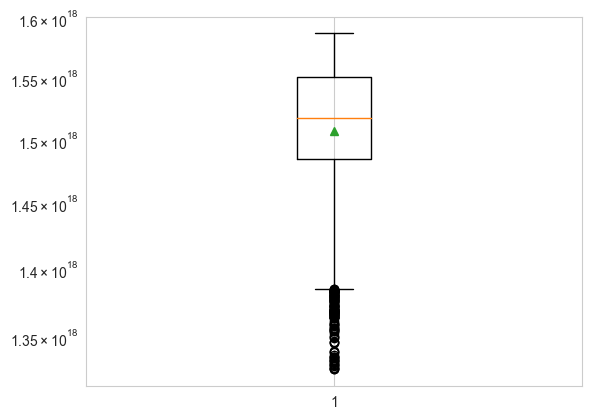

In [14]:
plot_boxplot(df_users, 'created_at_conv', log=True)

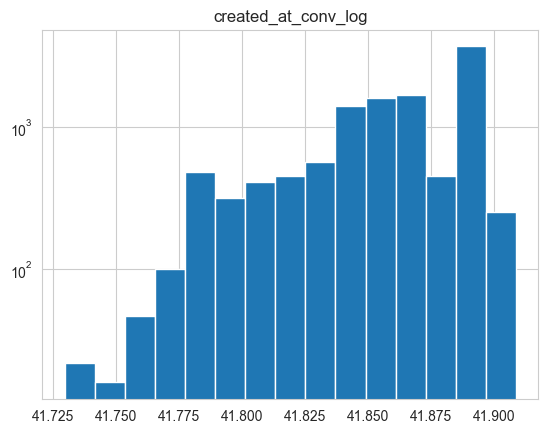

In [15]:
plot_hist(df_users[df_users['created_at_conv']!=np.inf], 'created_at_conv', log=True)

In [37]:
mean = np.mean(df_users['created_at_conv'].values)
median = np.median(df_users['created_at_conv'].values)
print("mean: " + str(pd.to_datetime(mean)))
print("median: " + str(pd.to_datetime(median)))

mean: 2017-10-03 21:23:16.013121280
median: 2018-01-30 17:20:36


In [16]:
pd.to_datetime([df_users.created_at_conv.min()])

DatetimeIndex(['2012-01-24 01:57:38'], dtype='datetime64[ns]', freq=None)

In [38]:
pd.to_datetime([df_users.created_at_conv.max()])

DatetimeIndex(['2020-04-21 07:28:31'], dtype='datetime64[ns]', freq=None)

In [6]:
df_corr = df_users.copy()
df_corr.drop(columns=['id', 'name', 'lang', 'bot'], inplace=True)
df_corr = df_corr[land(land(df_corr['statuses_count'] != -1, ~df_corr['statuses_count'].isnull()), df_corr['statuses_count'] != np.inf)]
df_corr['created_at'] = pd.to_datetime(df_corr['created_at']).astype(np.int64)
df_corr.drop(columns=['created_at_conv'], inplace=True)

                created_at  statuses_count
created_at        1.000000       -0.311606
statuses_count   -0.311606        1.000000


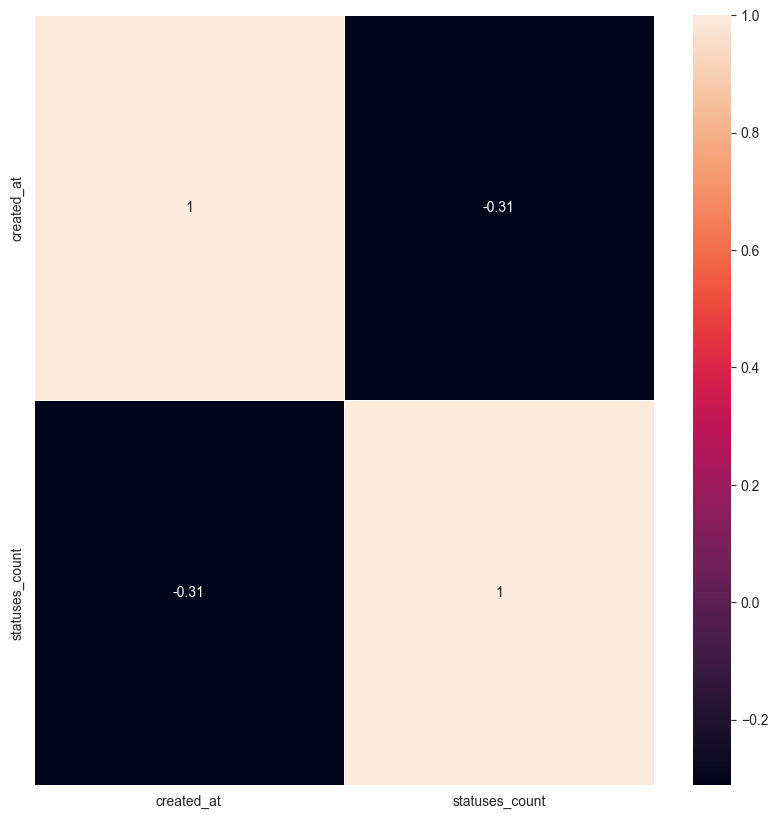

In [18]:
eval_correlation(df_corr, 'spearman')

# Tweets analysis

In [19]:
df_tweet.shape[0]

13664696

There are null values in all the attributes except for `created_at` column

In [20]:
df_tweet.info(null_counts=True)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_1236\899680598.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_tweet.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              13664694 non-null  object
 1   user_id         13447413 non-null  object
 2   retweet_count   13227562 non-null  object
 3   reply_count     13016818 non-null  object
 4   favorite_count  13017154 non-null  object
 5   num_hashtags    12607172 non-null  object
 6   num_urls        13016073 non-null  object
 7   num_mentions    12810531 non-null  object
 8   created_at      13664696 non-null  object
 9   text            13126975 non-null  object
dtypes: object(10)
memory usage: 1.0+ GB


## Counters analysis

In [7]:
attributes = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']
for attr in attributes:
    df_tweet[attr] = df_tweet[attr].apply(to_float)

In [22]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   user_id         object 
 2   retweet_count   float64
 3   reply_count     float64
 4   favorite_count  float64
 5   num_hashtags    float64
 6   num_urls        float64
 7   num_mentions    float64
 8   created_at      object 
 9   text            object 
dtypes: float64(6), object(4)
memory usage: 1.0+ GB


We have noticed a lot of huge values in the `retweet_count_conv` **(RCC)** column. By analysing statistics of real tweets on the web, we have decide to perform further analysis on records having a RCC value lower than 1e7 (https://en.wikipedia.org/wiki/List_of_most-retweeted_tweets)

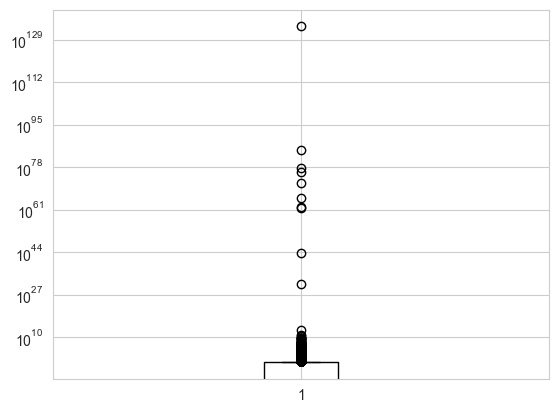

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


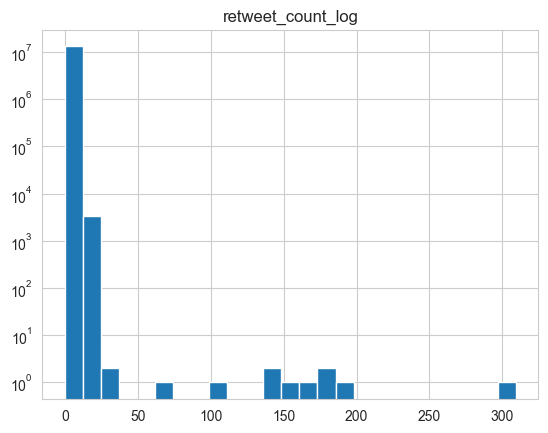

In [23]:
plot_boxplot(df_tweet, 'retweet_count', log=True)
plot_hist(df_tweet[df_tweet['retweet_count']!=np.inf], 'retweet_count', log=True)

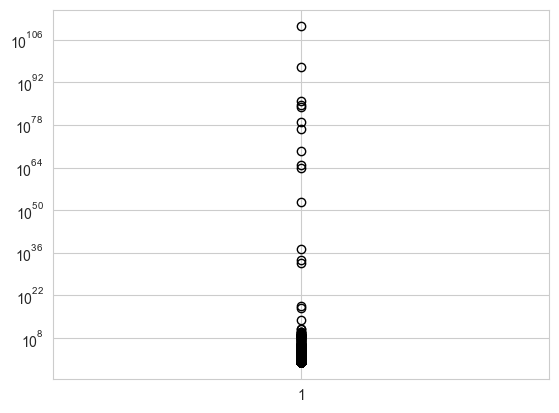

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


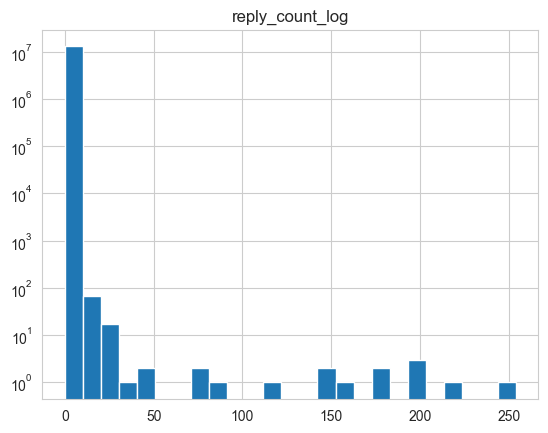

In [24]:
plot_boxplot(df_tweet, 'reply_count', log=True)
plot_hist(df_tweet[df_tweet['reply_count']!=np.inf], 'reply_count', log=True)

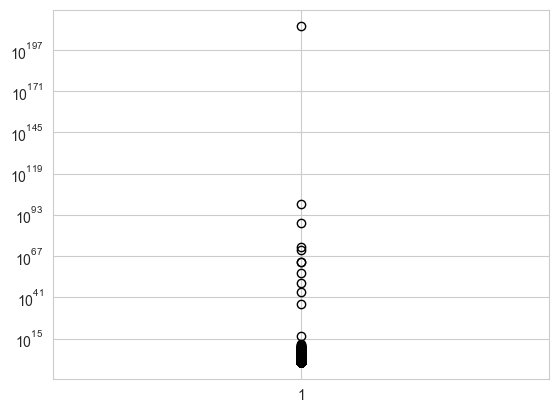

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


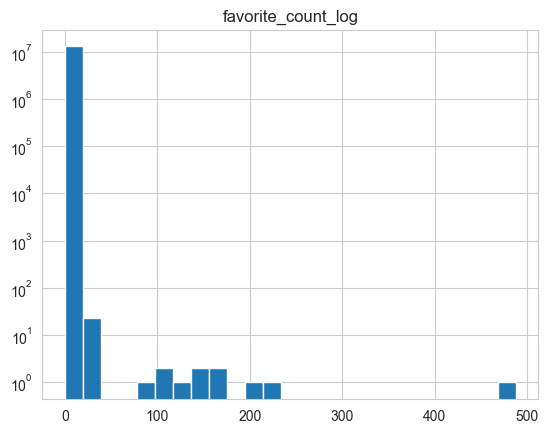

In [25]:
plot_boxplot(df_tweet, 'favorite_count', log=True)
plot_hist(df_tweet[df_tweet['favorite_count']!=np.inf], 'favorite_count', log=True)

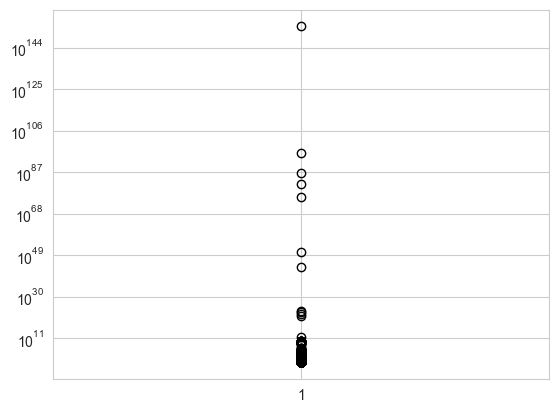

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


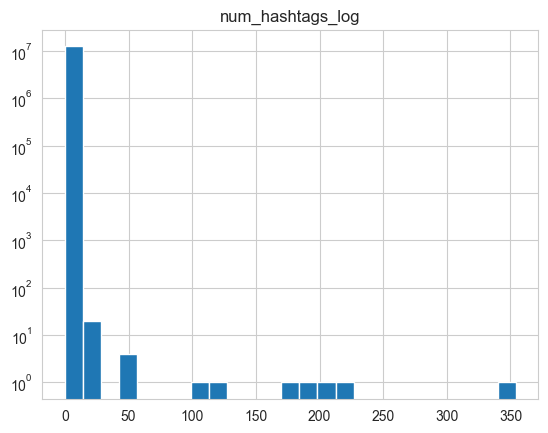

In [26]:
plot_boxplot(df_tweet, 'num_hashtags', log=True)
plot_hist(df_tweet[df_tweet['num_hashtags']!=np.inf], 'num_hashtags', log=True)

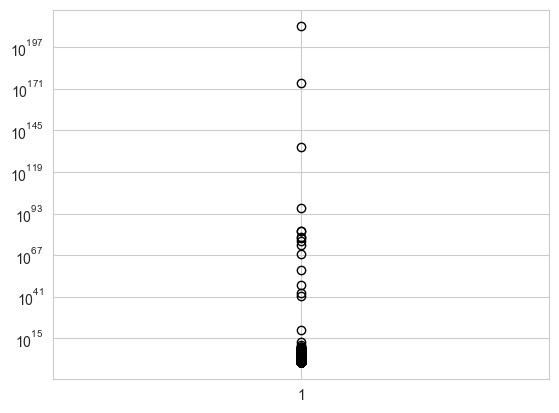

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


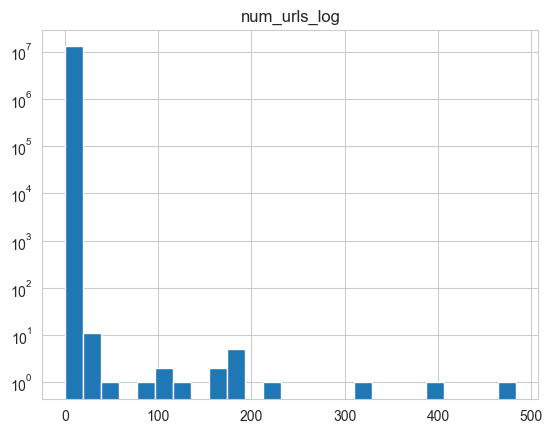

In [27]:
plot_boxplot(df_tweet, 'num_urls', log=True)
plot_hist(df_tweet[df_tweet['num_urls']!=np.inf], 'num_urls', log=True)

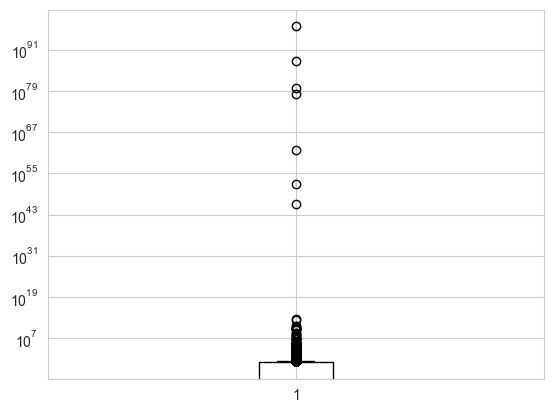

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: divide by zero encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)
C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:56: RuntimeWarning: invalid value encountered in log
  df[log_attribute_name] = np.log(dataframe[attribute_name].values)


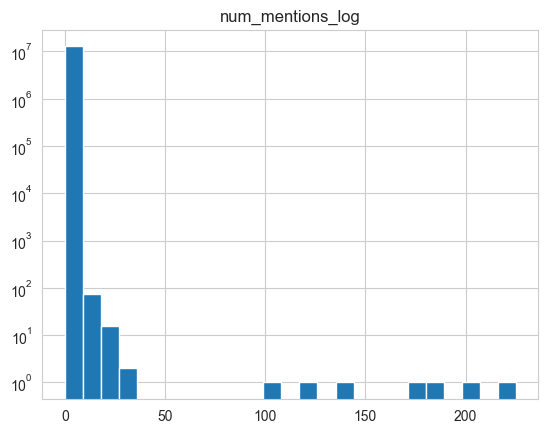

In [28]:
plot_boxplot(df_tweet, 'num_mentions', log=True)
plot_hist(df_tweet[df_tweet['num_mentions']!=np.inf], 'num_mentions', log=True)

All the counters seems to have a skewed distribution where the most frequent value is 0. We also noticed that there are some outliers with huge values in fact columns have been plotted on a logarithmic scale to make the information more understandable.

## Tweets created_at analysis

In [8]:
df_tweet['created_at_conv'] = pd.to_datetime(df_tweet['created_at']).astype(np.int64)

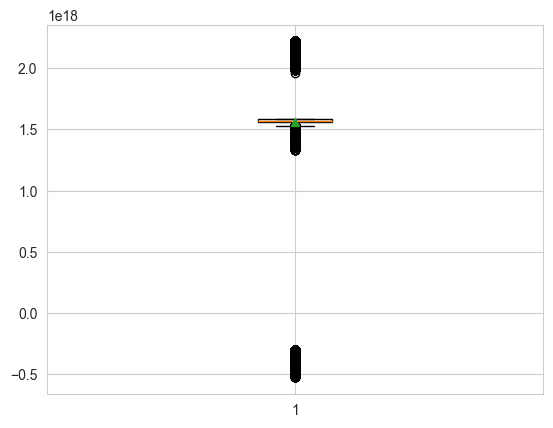

In [16]:
plot_boxplot(df_tweet, 'created_at_conv')

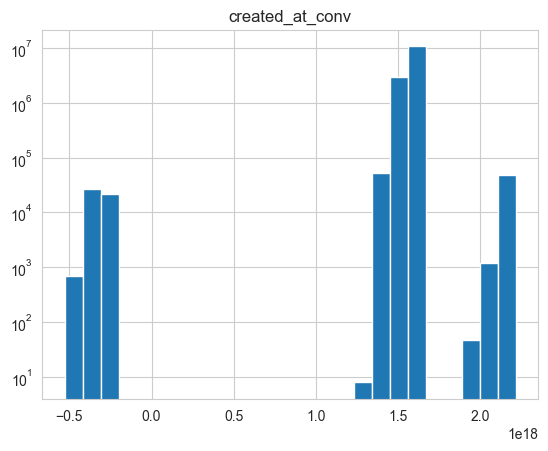

In [17]:
plot_hist(df_tweet, 'created_at_conv')

In [18]:
pd.to_datetime([df_tweet.created_at_conv.min()])

DatetimeIndex(['1953-04-17 12:24:33'], dtype='datetime64[ns]', freq=None)

In [19]:
pd.to_datetime([df_tweet.created_at_conv.max()])

DatetimeIndex(['2040-04-27 11:03:25'], dtype='datetime64[ns]', freq=None)

In [29]:
df_corr = df_tweet.copy()
df_corr.drop(columns=['id', 'user_id'], inplace=True)
for attr in attributes:
    df_corr = df_corr[(df_corr[attr] != -1) & df_corr[attr].notnull() & (df_corr[attr]< 1e7)]

C:\Users\Alessandro\Desktop\DataMining\DM_tweets\utilities.py:44: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


                retweet_count  reply_count  favorite_count  num_hashtags  \
retweet_count        1.000000     0.000706        0.050834      0.153832   
reply_count          0.000706     1.000000        0.002379      0.002138   
favorite_count       0.050834     0.002379        1.000000     -0.026223   
num_hashtags         0.153832     0.002138       -0.026223      1.000000   
num_urls            -0.021168    -0.008491       -0.139028      0.051468   
num_mentions         0.425944     0.020753       -0.082517      0.103931   

                num_urls  num_mentions  
retweet_count  -0.021168      0.425944  
reply_count    -0.008491      0.020753  
favorite_count -0.139028     -0.082517  
num_hashtags    0.051468      0.103931  
num_urls        1.000000     -0.082741  
num_mentions   -0.082741      1.000000  


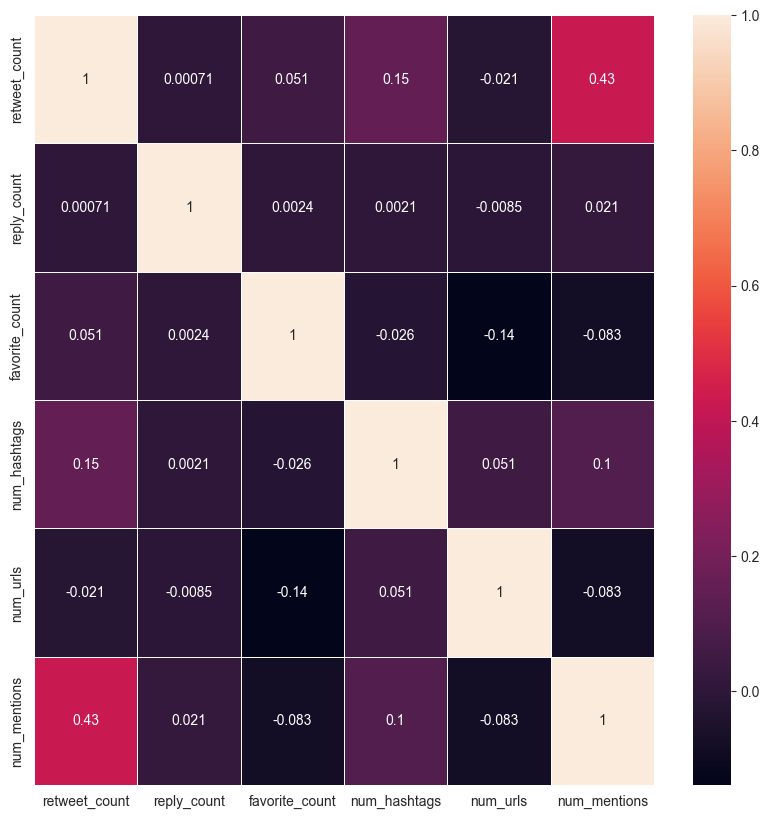

In [30]:
eval_correlation(df_corr, 'spearman')

In [31]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11864351 entries, 0 to 13664695
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   retweet_count   float64
 1   reply_count     float64
 2   favorite_count  float64
 3   num_hashtags    float64
 4   num_urls        float64
 5   num_mentions    float64
 6   created_at      object 
 7   text            object 
dtypes: float64(6), object(2)
memory usage: 814.7+ MB


In [38]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   user_id         object 
 2   retweet_count   float64
 3   reply_count     float64
 4   favorite_count  float64
 5   num_hashtags    float64
 6   num_urls        float64
 7   num_mentions    float64
 8   created_at      object 
 9   text            object 
dtypes: float64(6), object(4)
memory usage: 1.0+ GB


In [39]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [10]:
df_users_temp = df_users.drop(columns=["created_at"])
df_tweet_temp = df_tweet.drop(columns=["created_at"])
df_users_temp.id = df_users_temp.id.astype(str)
df_merged = df_tweet_temp.merge(df_users_temp, left_on='user_id', right_on='id', how='left')
len(df_merged[land(~df_merged["id_x"].isnull(), df_merged["id_y"].isnull())].id_x.unique())

433528